In [1]:
%load_ext autoreload
%autoreload 2

# Add project root folder to module loading paths.
import sys
sys.path.append('../..')

# Import 3rd party dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import custom k-means implementation.
from homemade.k_means import KMeans

In [2]:
# Load the data.
data = pd.read_csv('../../data/iris.csv')

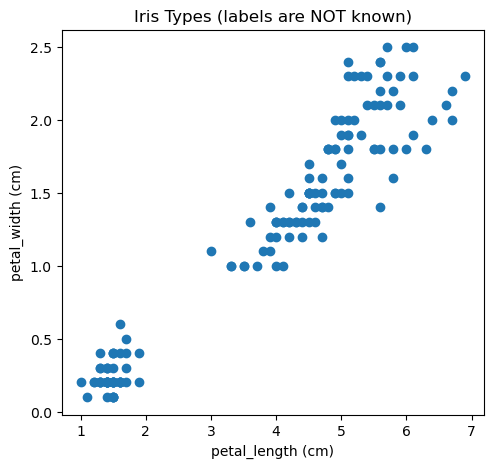

In [3]:
# List of suppported Iris classes.
iris_types = ['SETOSA', 'VERSICOLOR', 'VIRGINICA']

# Pick the Iris parameters for consideration.
x_axis = 'petal_length'
y_axis = 'petal_width'

# Make the plot a little bit big
plt.figure(figsize=(12, 5))

# Plot non-classified scatter of Iris flowers.
plt.subplot(1, 2, 2)
plt.scatter(
    data[x_axis][:],
    data[y_axis][:],
)
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris Types (labels are NOT known)')

# Plot all subplots.
plt.show()

In [12]:
# Get total number of Iris examples.
num_examples = data.shape[0]

# create a 2D numpy array that has 'petal_length' and 'petal_width'
x_train = data[[x_axis, y_axis]].values.reshape((num_examples, 2))

In [13]:
# Set K-Means parameters.
num_clusters = 3  # Number of clusters into which we want to split our training dataset.
max_iterations = 50  # maximum number of training iterations.

# Choose the Number of Clusters (K)
k_means = KMeans(x_train, num_clusters)

In [14]:
# Train the K-Means model 
(centroids, closest_centroids_ids) = k_means.train(max_iterations)

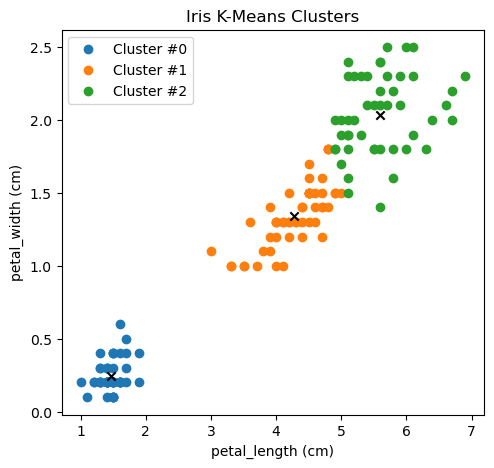

In [24]:
# Plot UNSUPERWISED Iris flower classification.

# Make the plot a little bit bigger than default one.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
for centroid_id, centroid in enumerate(centroids):
    current_examples_indices = (closest_centroids_ids == centroid_id).flatten()
    plt.scatter(
        data[x_axis][current_examples_indices],
        data[y_axis][current_examples_indices],
        label='Cluster #' + str(centroid_id)
    )
    
# Plot clusters centroids.
for centroid_id, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], c='black', marker='x')
    
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris K-Means Clusters')
plt.legend()

# Show all subplots.
plt.show()